In [27]:
import hdbscan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pickle import dump, load
from sklearn.datasets import make_blobs
from scipy.spatial import distance

## a) Datos obtenidos tras el feature selection

In [28]:
X_train = pd.read_csv('../Samples/Clean/Feature_Selection/X_train.csv')
X_test = pd.read_csv('../Samples/Clean/Feature_Selection/X_test.csv')
y_train = pd.read_csv('../Samples/Clean/Feature_Selection/Y_train.csv')
y_test = pd.read_csv('../Samples/Clean/Feature_Selection/Y_test.csv')

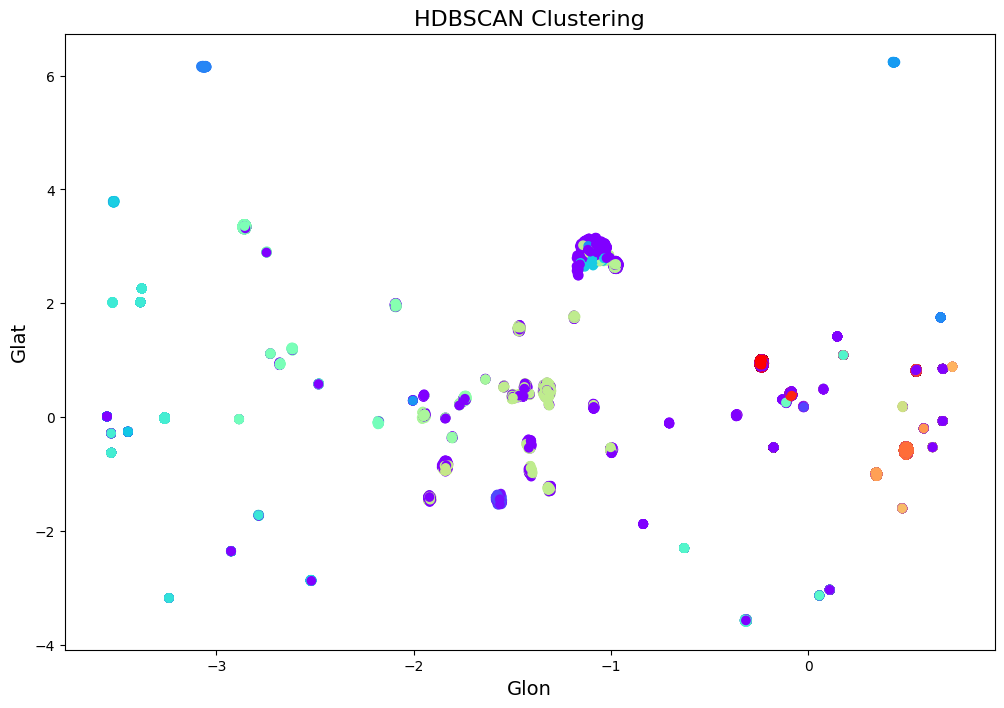

In [11]:
#Convertir el DataFrame completo a un array NumPy
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Crear y ajustar el modelo HDBSCAN sin paralelismo explícito
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, core_dist_n_jobs=1, gen_min_span_tree=True)
y_predict_train = clusterer.fit_predict(X_train_array)

# Visualizar los resultados
plt.figure(figsize=(12, 8))
plt.scatter(X_train_array[:, 0], X_train_array[:, 1], c=y_predict_train, cmap='rainbow', marker='o')
plt.title('HDBSCAN Clustering', fontsize=16)
plt.xlabel('Glon', fontsize=14)
plt.ylabel('Glat', fontsize=14)
plt.show()



In [12]:
# Mostrar algunas métricas del clustering
print(f"Number of clusters: {len(set(y_predict_train)) - (1 if -1 in y_predict_train else 0)}")
print(f"Cluster labels: {np.unique(y_predict_train)}")

Number of clusters: 125
Cluster labels: [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124]


In [26]:
# Calcular los centroides basados en las etiquetas
unique_labels = np.unique(y_predict_train)
cluster_centers = np.array([X_train_array[y_predict_train == label].mean(axis=0) for label in unique_labels if label != -1])

# Calcular la distancia de cada punto de prueba a los centroides
distances_to_centers = distance.cdist(X_test_array, cluster_centers, 'euclidean')

# Asignar cada punto de prueba al clúster cuyo centroide esté más cercano
y_predict_test = np.argmin(distances_to_centers, axis=1)


NameError: name 'y_predict_train' is not defined

In [ ]:
# Obtener los valores de "Glon" y "Glat"
X_train_glon_glat = X_train[['_Glon', '_Glat','_RAJ2000','_DEJ2000','Dist']]
X_test_glon_glat = X_test[['_Glon', '_Glat','_RAJ2000','_DEJ2000','Dist']]

In [ ]:
# Unir y_test y y_predict_test con X_test
X_test_with_y_test = X_test.copy()
X_test_with_y_test['y_test'] = y_test.to_numpy().ravel()
X_test_with_y_predict_test = X_test.copy()
X_test_with_y_predict_test['y_predict_test'] = y_predict_test

In [ ]:

dump(clusterer, open("../Models/HDBSCAN.pkl", "wb"))
X_test_with_y_test.to_csv('../Samples/Clean/Testing/HDBSCAN/test.csv', index=False)
X_test_with_y_predict_test.to_csv('../Samples/Clean/Testing/HDBSCAN/predict.csv', index=False)

NameError: name 'X_test_with_y_test' is not defined

In [ ]:
X_test_with_y_test.columns

Index(['_Glon', '_Glat', '_RAJ2000', '_DEJ2000', 'PM', 'pmRA', 'pmDE',
       'RADEcor', 'RAPlxcor', 'RApmRAcor', 'RApmDEcor', 'DEPlxcor',
       'DEpmRAcor', 'DEpmDEcor', 'PlxpmRAcor', 'PlxpmDEcor', 'pmRApmDEcor',
       'NAL', 'NgAL', 'Nper', 'MatchObs', 'o_Gmag', 'e_FG', 'o_BPmag', 'e_FBP',
       'o_RPmag', 'e_FRP', 'NBPblend', 'NRPblend', 'BP-RP', 'BP-G', 'G-RP',
       'PSS', 'angDist', 'B-R', 'Dist', 'y_test'],
      dtype='object')

Comprobación gráfica

In [ ]:
X_test_with_y_test = pd.read_csv('../Samples/Clean/Testing/HDBSCAN/test.csv')
X_test_with_y_predict_test = pd.read_csv('../Samples/Clean/Testing/HDBSCAN/predict.csv')

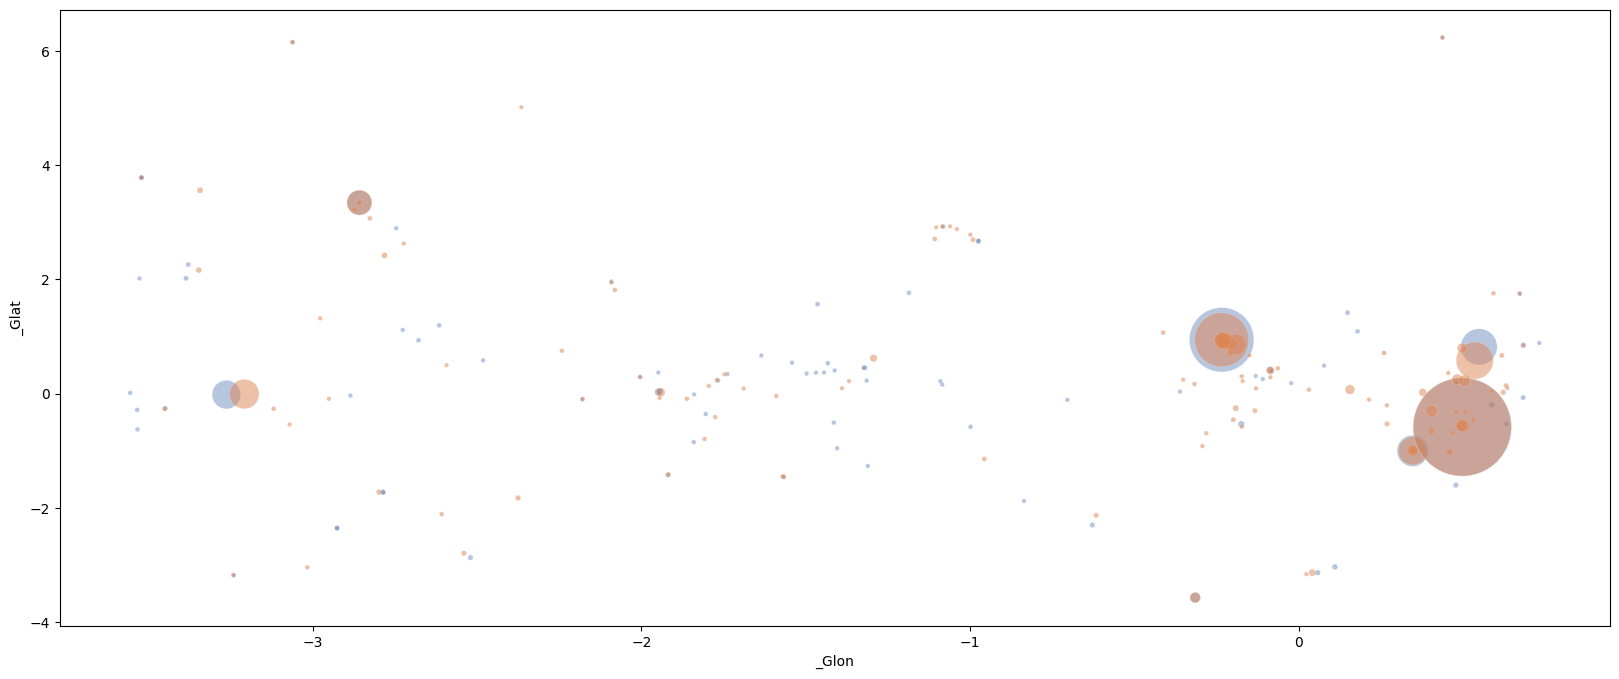

In [ ]:
from tools import graphic_tester
graphic_tester(X_test_with_y_test, X_test_with_y_predict_test, 'y_test', 'y_predict_test', '_Glon', '_Glat')

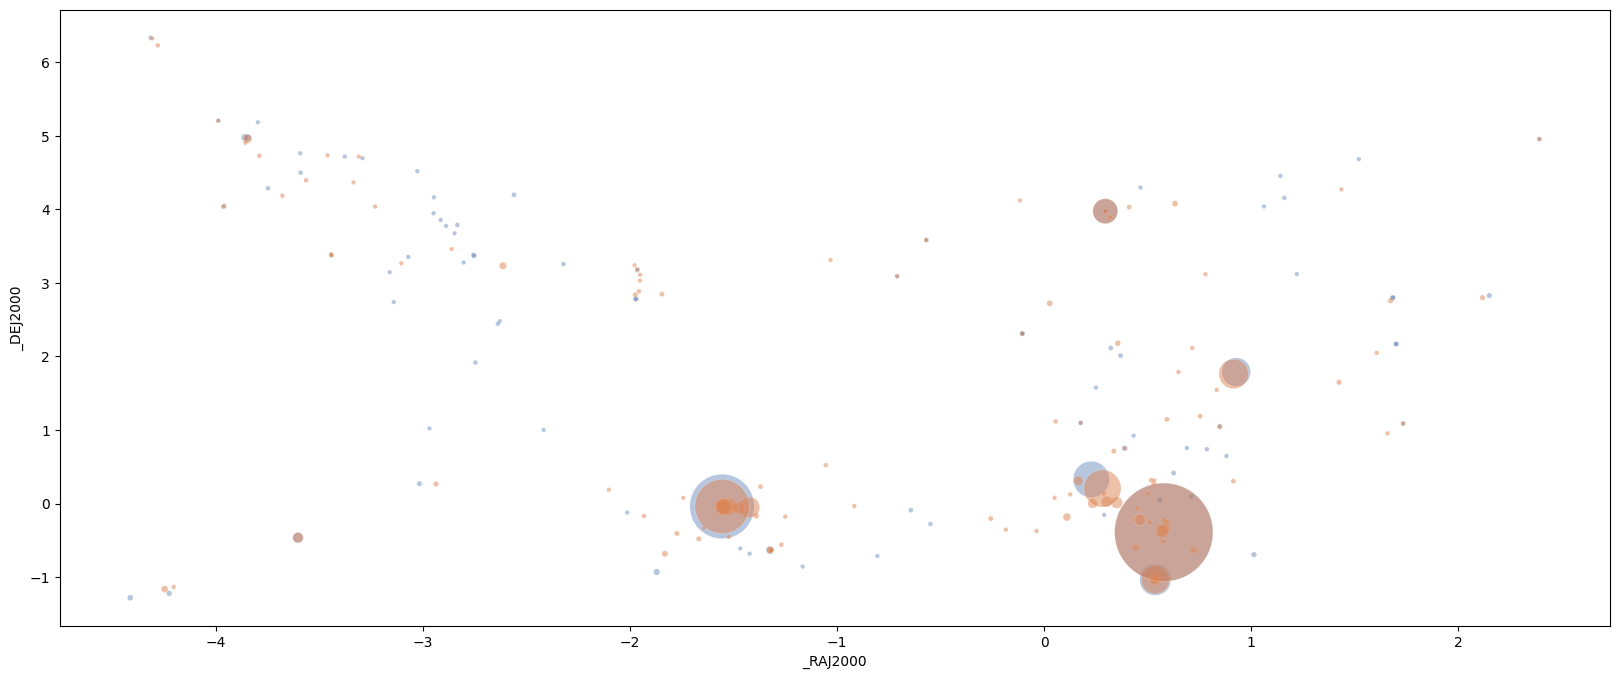

In [ ]:
graphic_tester(X_test_with_y_test, X_test_with_y_predict_test, 'y_test', 'y_predict_test', '_RAJ2000', '_DEJ2000')

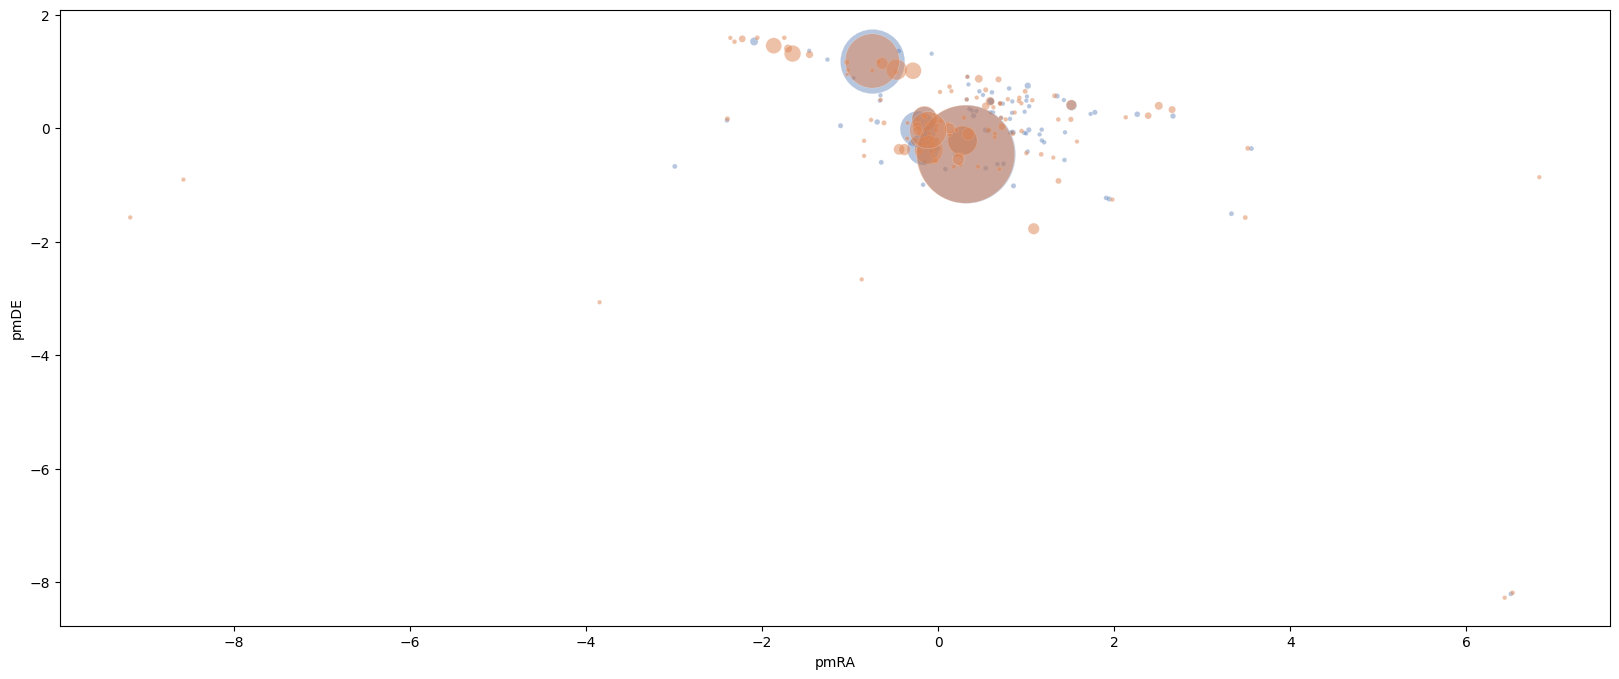

In [ ]:
graphic_tester(X_test_with_y_test, X_test_with_y_predict_test, 'y_test', 'y_predict_test', 'pmRA', 'pmDE')

## b) Datos obtenidos tras el human feature selection

In [2]:
X_train_human = pd.read_csv('../Samples/Clean/Feature_Selection/X_train_human.csv')
X_test_human = pd.read_csv('../Samples/Clean/Feature_Selection/X_test_human.csv')
Y_train_human = pd.read_csv('../Samples/Clean/Feature_Selection/Y_train_human.csv')
Y_test_human = pd.read_csv('../Samples/Clean/Feature_Selection/Y_test_human.csv')

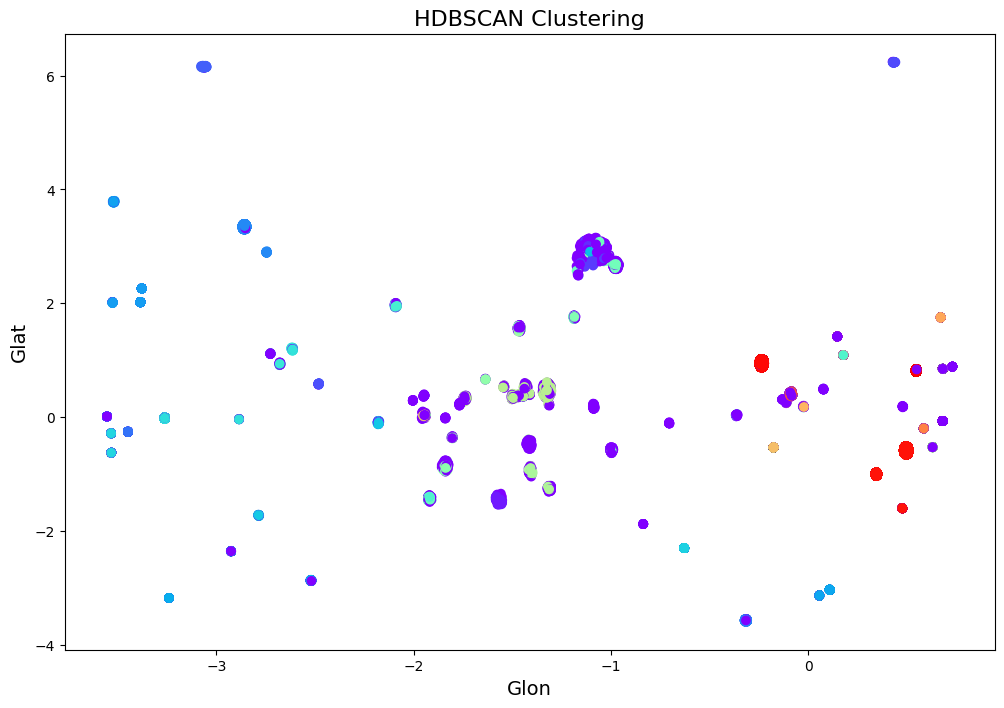

In [3]:
#Convertir el DataFrame completo a un array NumPy
X_train_human_array = X_train_human.to_numpy()
X_test_human_array = X_test_human.to_numpy()

# Crear y ajustar el modelo HDBSCAN sin paralelismo explícito
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, core_dist_n_jobs=1, gen_min_span_tree=True)
y_predict_train_human = clusterer.fit_predict(X_train_human_array)

# Visualizar los resultados
plt.figure(figsize=(12, 8))
plt.scatter(X_train_human_array[:, 0], X_train_human_array[:, 1], c=y_predict_train_human, cmap='rainbow', marker='o')
plt.title('HDBSCAN Clustering', fontsize=16)
plt.xlabel('Glon', fontsize=14)
plt.ylabel('Glat', fontsize=14)
plt.show()


In [4]:
# Mostrar algunas métricas del clustering
print(f"Number of clusters: {len(set(y_predict_train_human)) - (1 if -1 in y_predict_train_human else 0)}")
print(f"Cluster labels: {np.unique(y_predict_train_human)}")

Number of clusters: 154
Cluster labels: [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153]


In [10]:
# Calcular los centroides basados en las etiquetas
unique_labels = np.unique(y_predict_train_human)
cluster_centers = np.array([X_train_human_array[y_predict_train_human == label].mean(axis=0) for label in unique_labels if label != -1])

# Calcular la distancia de cada punto de prueba a los centroides
distances_to_centers = distance.cdist(X_test_human_array, cluster_centers, 'euclidean')

# Asignar cada punto de prueba al clúster cuyo centroide esté más cercano
y_predict_test_human = np.argmin(distances_to_centers, axis=1)

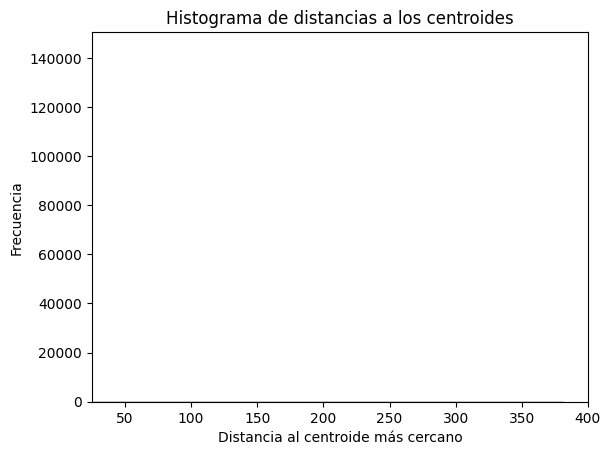

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Supongamos que tienes las variables:
# X_test_human_array: datos de prueba
# cluster_centers: centroides de los clústeres
# y_predict_test_human: predicciones de clúster para los datos de prueba

# Calcular la distancia de cada punto de prueba a los centroides
distances_to_centers = distance.cdist(X_test_human_array, cluster_centers, 'euclidean')

# Obtener las distancias mínimas a los centroides para cada punto de prueba
min_distances = np.min(distances_to_centers, axis=1)

# Crear un histograma de las distancias
plt.hist(min_distances, bins=20, color='skyblue', edgecolor='black')

# Limitar el eje y hasta 20000
plt.xlim(25, 400)

# Añadir etiquetas y título
plt.xlabel('Distancia al centroide más cercano')
plt.ylabel('Frecuencia')
plt.title('Histograma de distancias a los centroides')

# Mostrar el histograma
plt.show()


In [11]:

# Obtener los valores de "Glon" y "Glat"
X_train_human_glon_glat = X_train_human[['_Glon', '_Glat','_RAJ2000','_DEJ2000','Dist']]
X_test_human_glon_glat = X_test_human[['_Glon', '_Glat','_RAJ2000','_DEJ2000','Dist']]



In [12]:
# Unir y_test y y_predict_test con X_test
X_test_with_y_test_human = X_test_human.copy()
X_test_with_y_test_human['y_test_human'] = Y_test_human.to_numpy().ravel()
X_test_with_y_predict_test_human = X_test_human.copy()
X_test_with_y_predict_test_human['y_predict_test_human'] = y_predict_test_human

In [13]:
dump(clusterer, open("../Models/HDBSCAN-human.pkl", "wb"))
X_test_with_y_test_human.to_csv('../Samples/Clean/Testing/HDBSCAN/test_human.csv', index=False)
X_test_with_y_predict_test_human.to_csv('../Samples/Clean/Testing/HDBSCAN/predict_human.csv', index=False)

In [14]:
X_test_with_y_test_human.columns

Index(['_Glon', '_Glat', '_RAJ2000', '_DEJ2000', 'Plx', 'pmRA', 'pmDE', 'FG',
       'Gmag', 'FBP', 'BPmag', 'FRP', 'RPmag', 'B-R', 'BP-RP', 'BP-G', 'G-RP',
       'MG', 'angDist', 'Dist', 'y_test_human'],
      dtype='object')

Comprobación gráfica

In [15]:
X_test_with_y_test_human = pd.read_csv('../Samples/Clean/Testing/HDBSCAN/test_human.csv')
X_test_with_y_predict_test_human = pd.read_csv('../Samples/Clean/Testing/HDBSCAN/predict_human.csv')

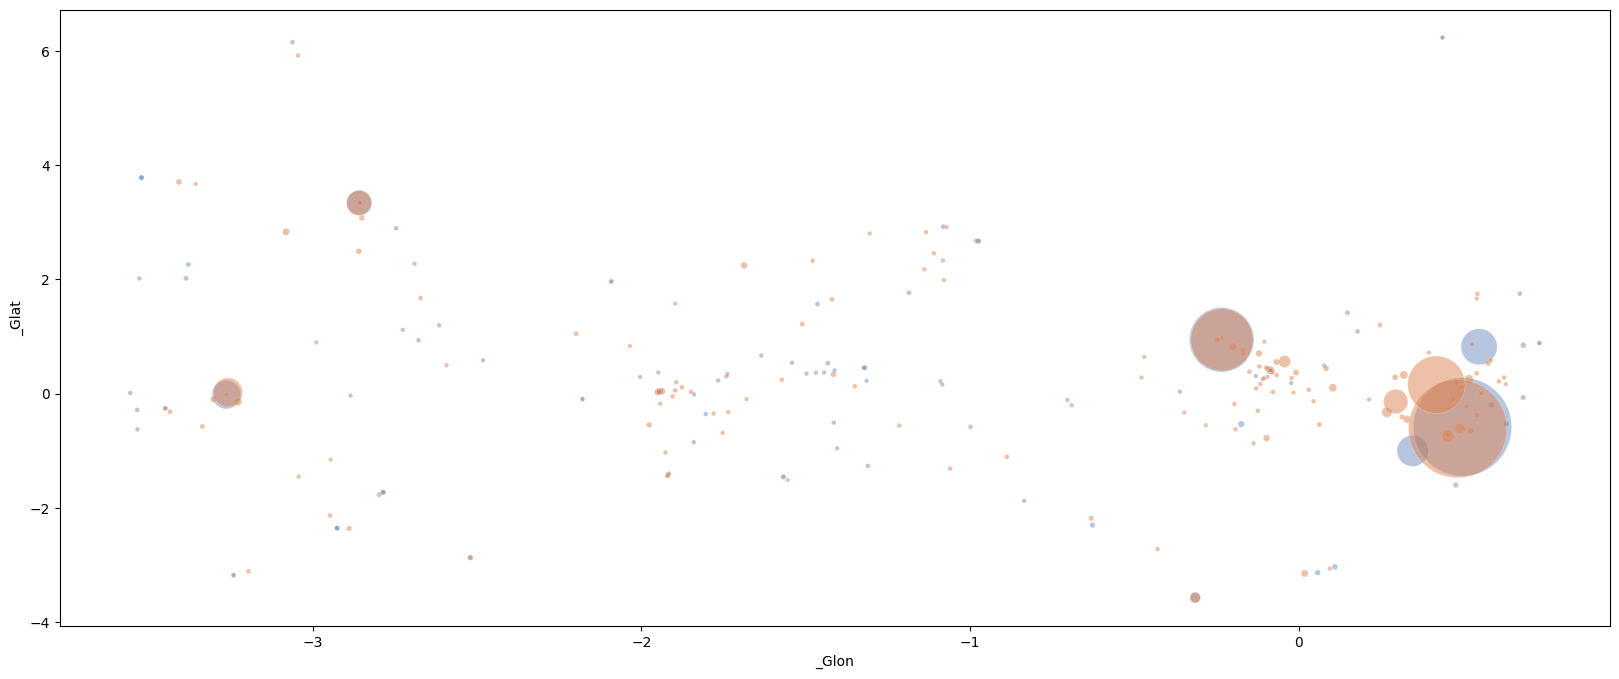

In [16]:
from tools import graphic_tester
graphic_tester(X_test_with_y_test_human, X_test_with_y_predict_test_human, 'y_test_human', 'y_predict_test_human', '_Glon', '_Glat')

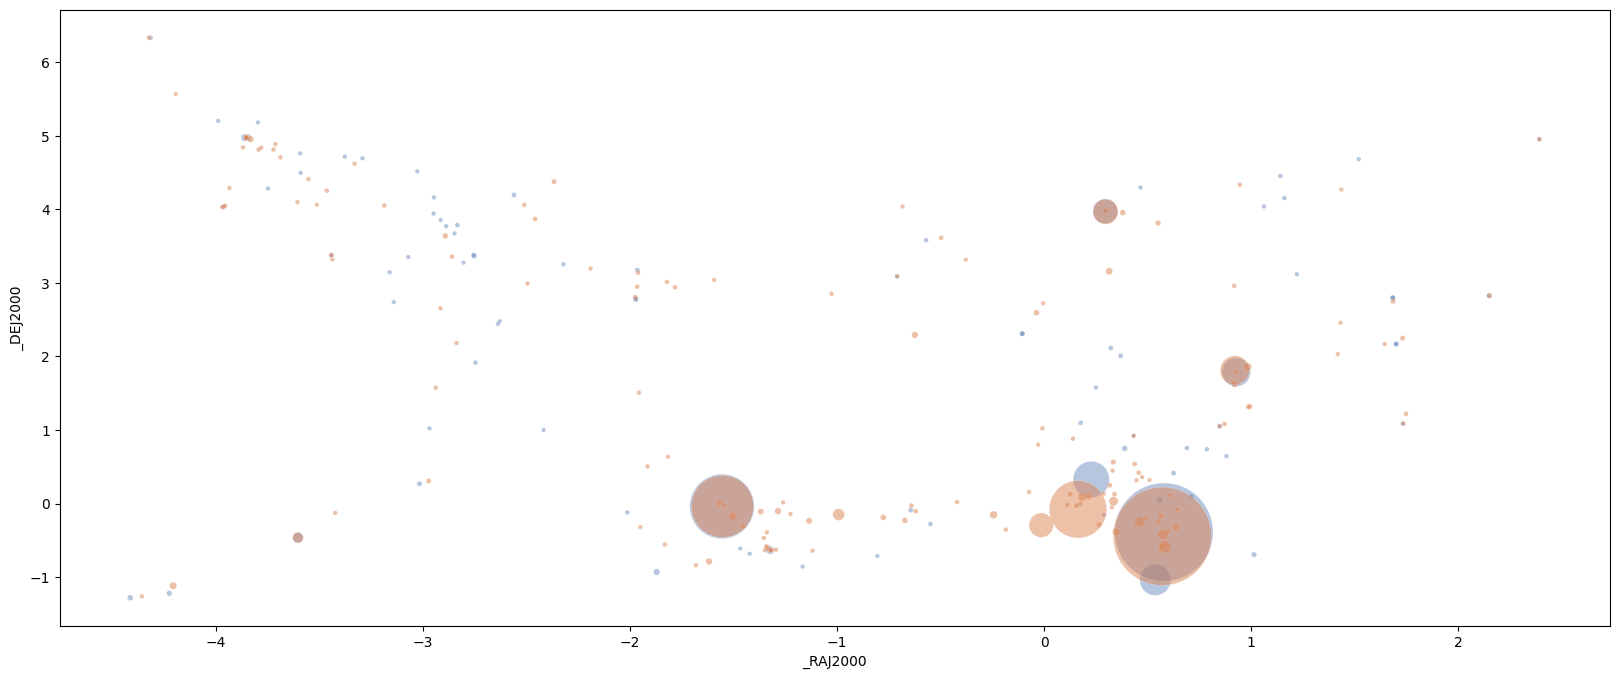

In [17]:
graphic_tester(X_test_with_y_test_human, X_test_with_y_predict_test_human, 'y_test_human', 'y_predict_test_human', '_RAJ2000', '_DEJ2000')

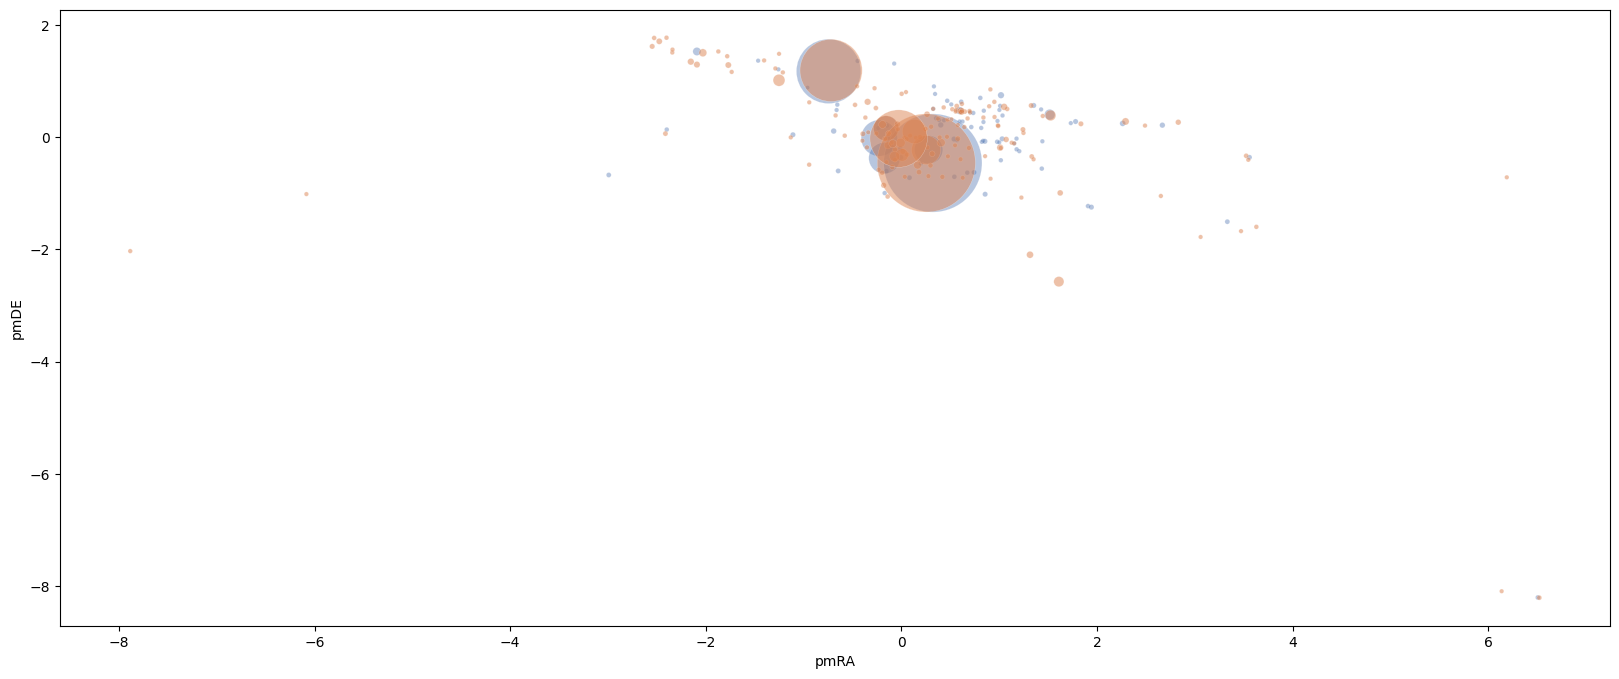

In [18]:
graphic_tester(X_test_with_y_test_human, X_test_with_y_predict_test_human, 'y_test_human', 'y_predict_test_human', 'pmRA', 'pmDE')

# Optimización de hiperparámetros a partir del human feature selection.

In [ ]:
#Convertir el DataFrame completo a un array NumPy
X_train_human_array = X_train_human.to_numpy()
X_test_human_array = X_test_human.to_numpy()

# Crear y ajustar el modelo HDBSCAN sin paralelismo explícito
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, core_dist_n_jobs=1, gen_min_span_tree=True)
y_predict_train_human = clusterer.fit_predict(X_train_human_array)

In [ ]:
# Mostrar algunas métricas del clustering
print(f"Number of clusters: {len(set(y_predict_train_human)) - (1 if -1 in y_predict_train_human else 0)}")
print(f"Cluster labels: {np.unique(y_predict_train_human)}")

In [ ]:
X_test_with_y_test_human = pd.read_csv('../Samples/Clean/Testing/HDBSCAN/test_human.csv')
X_test_with_y_predict_test_human = pd.read_csv('../Samples/Clean/Testing/HDBSCAN/predict_human.csv')

In [ ]:
# Calcular los centroides basados en las etiquetas
unique_labels = np.unique(y_predict_train_human)
cluster_centers = np.array([X_train_human_array[y_predict_train_human == label].mean(axis=0) for label in unique_labels if label != -1])

# Calcular la distancia de cada punto de prueba a los centroides
distances_to_centers = distance.cdist(X_test_human_array, cluster_centers, 'euclidean')

# Asignar cada punto de prueba al clúster cuyo centroide esté más cercano
y_predict_test_human = np.argmin(distances_to_centers, axis=1)

In [ ]:
from tools import graphic_tester
graphic_tester(X_test_with_y_test_human, X_test_with_y_predict_test_human, 'y_test_human', 'y_predict_test_human', '_Glon', '_Glat')

In [ ]:
graphic_tester(X_test_with_y_test_human, X_test_with_y_predict_test_human, 'y_test_human', 'y_predict_test_human', '_RAJ2000', '_DEJ2000')

In [ ]:
graphic_tester(X_test_with_y_test_human, X_test_with_y_predict_test_human, 'y_test_human', 'y_predict_test_human', 'pmRA', 'pmDE')